### <h1> SPRING 2025 DATA 115 </h1>
<h1> FINAL PROJECT: WINE QUALITY </h1>

# Team 2 
# Liam Bachelor, Sainofo Fanene, Conor Tradewell 
# 4.30.2025 

In [2]:
# data cleaning wine quality
# required library
import pandas as pd

# loading the datasets
rwq_df = pd.read_csv('winequality-red.csv', sep=';')
wwq_df = pd.read_csv('winequality-white.csv', sep=';')

# 'type' column
rwq_df['type'] = 'red'
wwq_df['type'] = 'white'

# Combining the datasets
wine = pd.concat([rwq_df, wwq_df], axis=0)

# Resetting index
wine.reset_index(drop=True, inplace=True)

# Checking initial info
wine.info()

# Checking for any missing values
wine.isnull().sum()

# Check for any duplicates
wine.duplicated().sum()
wine = wine.drop_duplicates()

# Final result of the cleaned data
wine.describe()
wine.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red


<h1>WINE QUALITY DATASET CLEANING SUMMARY</h1>
     
<p1>The code shows where two of the datasets are loaded--red wine and white wine. We have combined the two datasets into one dataframe by implementing the column, naming it as 'type' and creating a variable named 'wine' which leads to using pd.concat(). We checked if there was any missing values and it has resulted as no missing values. There was duplicates which ended up dropping. The outliers were checked but not removed. All data types were appropriate as the code was good to execute.</p1>

<h1> FEATURES </h1>

| Feature                   | Description                                      | Data Type | Typical Range     |
|:---------------------------:|:--------------------------------------------------:|:-----------:|:-------------------:|
| `fixed_acidity`           | Tartaric acid (g/dm³)                            | float     | 4.6 – 15.9        |
| `volatile_acidity`        | Acetic acid (g/dm³)                              | float     | 0.12 – 1.58       |
| `citric_acid`             | Citric acid (g/dm³)                              | float     | 0 – 1.66          |
| `residual_sugar`          | Remaining sugars after fermentation (g/dm³)      | float     | 0.6 – 65.8        |
| `chlorides`               | Salt concentration (g/dm³)                       | float     | 0.009 – 0.346     |
| `free_sulfur_dioxide`     | Free SO₂ (mg/dm³)                                | float     | 1 – 289           |
| `total_sulfur_dioxide`    | Total SO₂ (mg/dm³)                               | float     | 6 – 440           |
| `density`                 | Density of the wine (g/cm³)                      | float     | 0.987 – 1.039     |
| `pH`                      | Acidity level (0–14 scale)                       | float     | 2.72 – 4.01       |
| `sulphates`               | Potassium sulphate content (g/dm³)               | float     | 0.22 – 2.0        |
| `alcohol`                 | Alcohol content (% vol)                          | float     | 8.0 – 14.9        |
| `quality`                 | Quality score (sensory rating from 0 to 10)      | int       | 3 – 9             |
| `type`                    | Wine type label (`'red'` or `'white'`)           | object    | red / white       |

<h1>HOW THE DATA WAS GATHERED</h1>
<p1> The data was gathered by researchers from the University of Minho in Portugal. In the data collection, physicochemical tests were performed for the red and white wine--"Vinho Verde" wine samples. Each sample was sensory-rated by wine tasters on quality scale from 1 to 10. The objective lab measurements (acidity, sugar, pH) were paired with subjective quality scores.</p1>

<h1>PURPOSE</h1>
<p1>The goal was to explore how physicochemical attributes relate to perceived wine quality. Cases have happpen in predicting the wine quality, understanding which features influence wine taste the most, and benchmark classification and regression models. The dataset was used in several research papers to develop predictive models for wine quality.</p1>

<h1> MORE INFO </h1>

- about 6497 rows after removing duplicates 
- 13 features & 1 type label for columns 
- Red & White were the wine types labeled in a new 'type' 

<h1> GRAPHICAL ANALYSIS </h1>

C:\Users\lemur\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


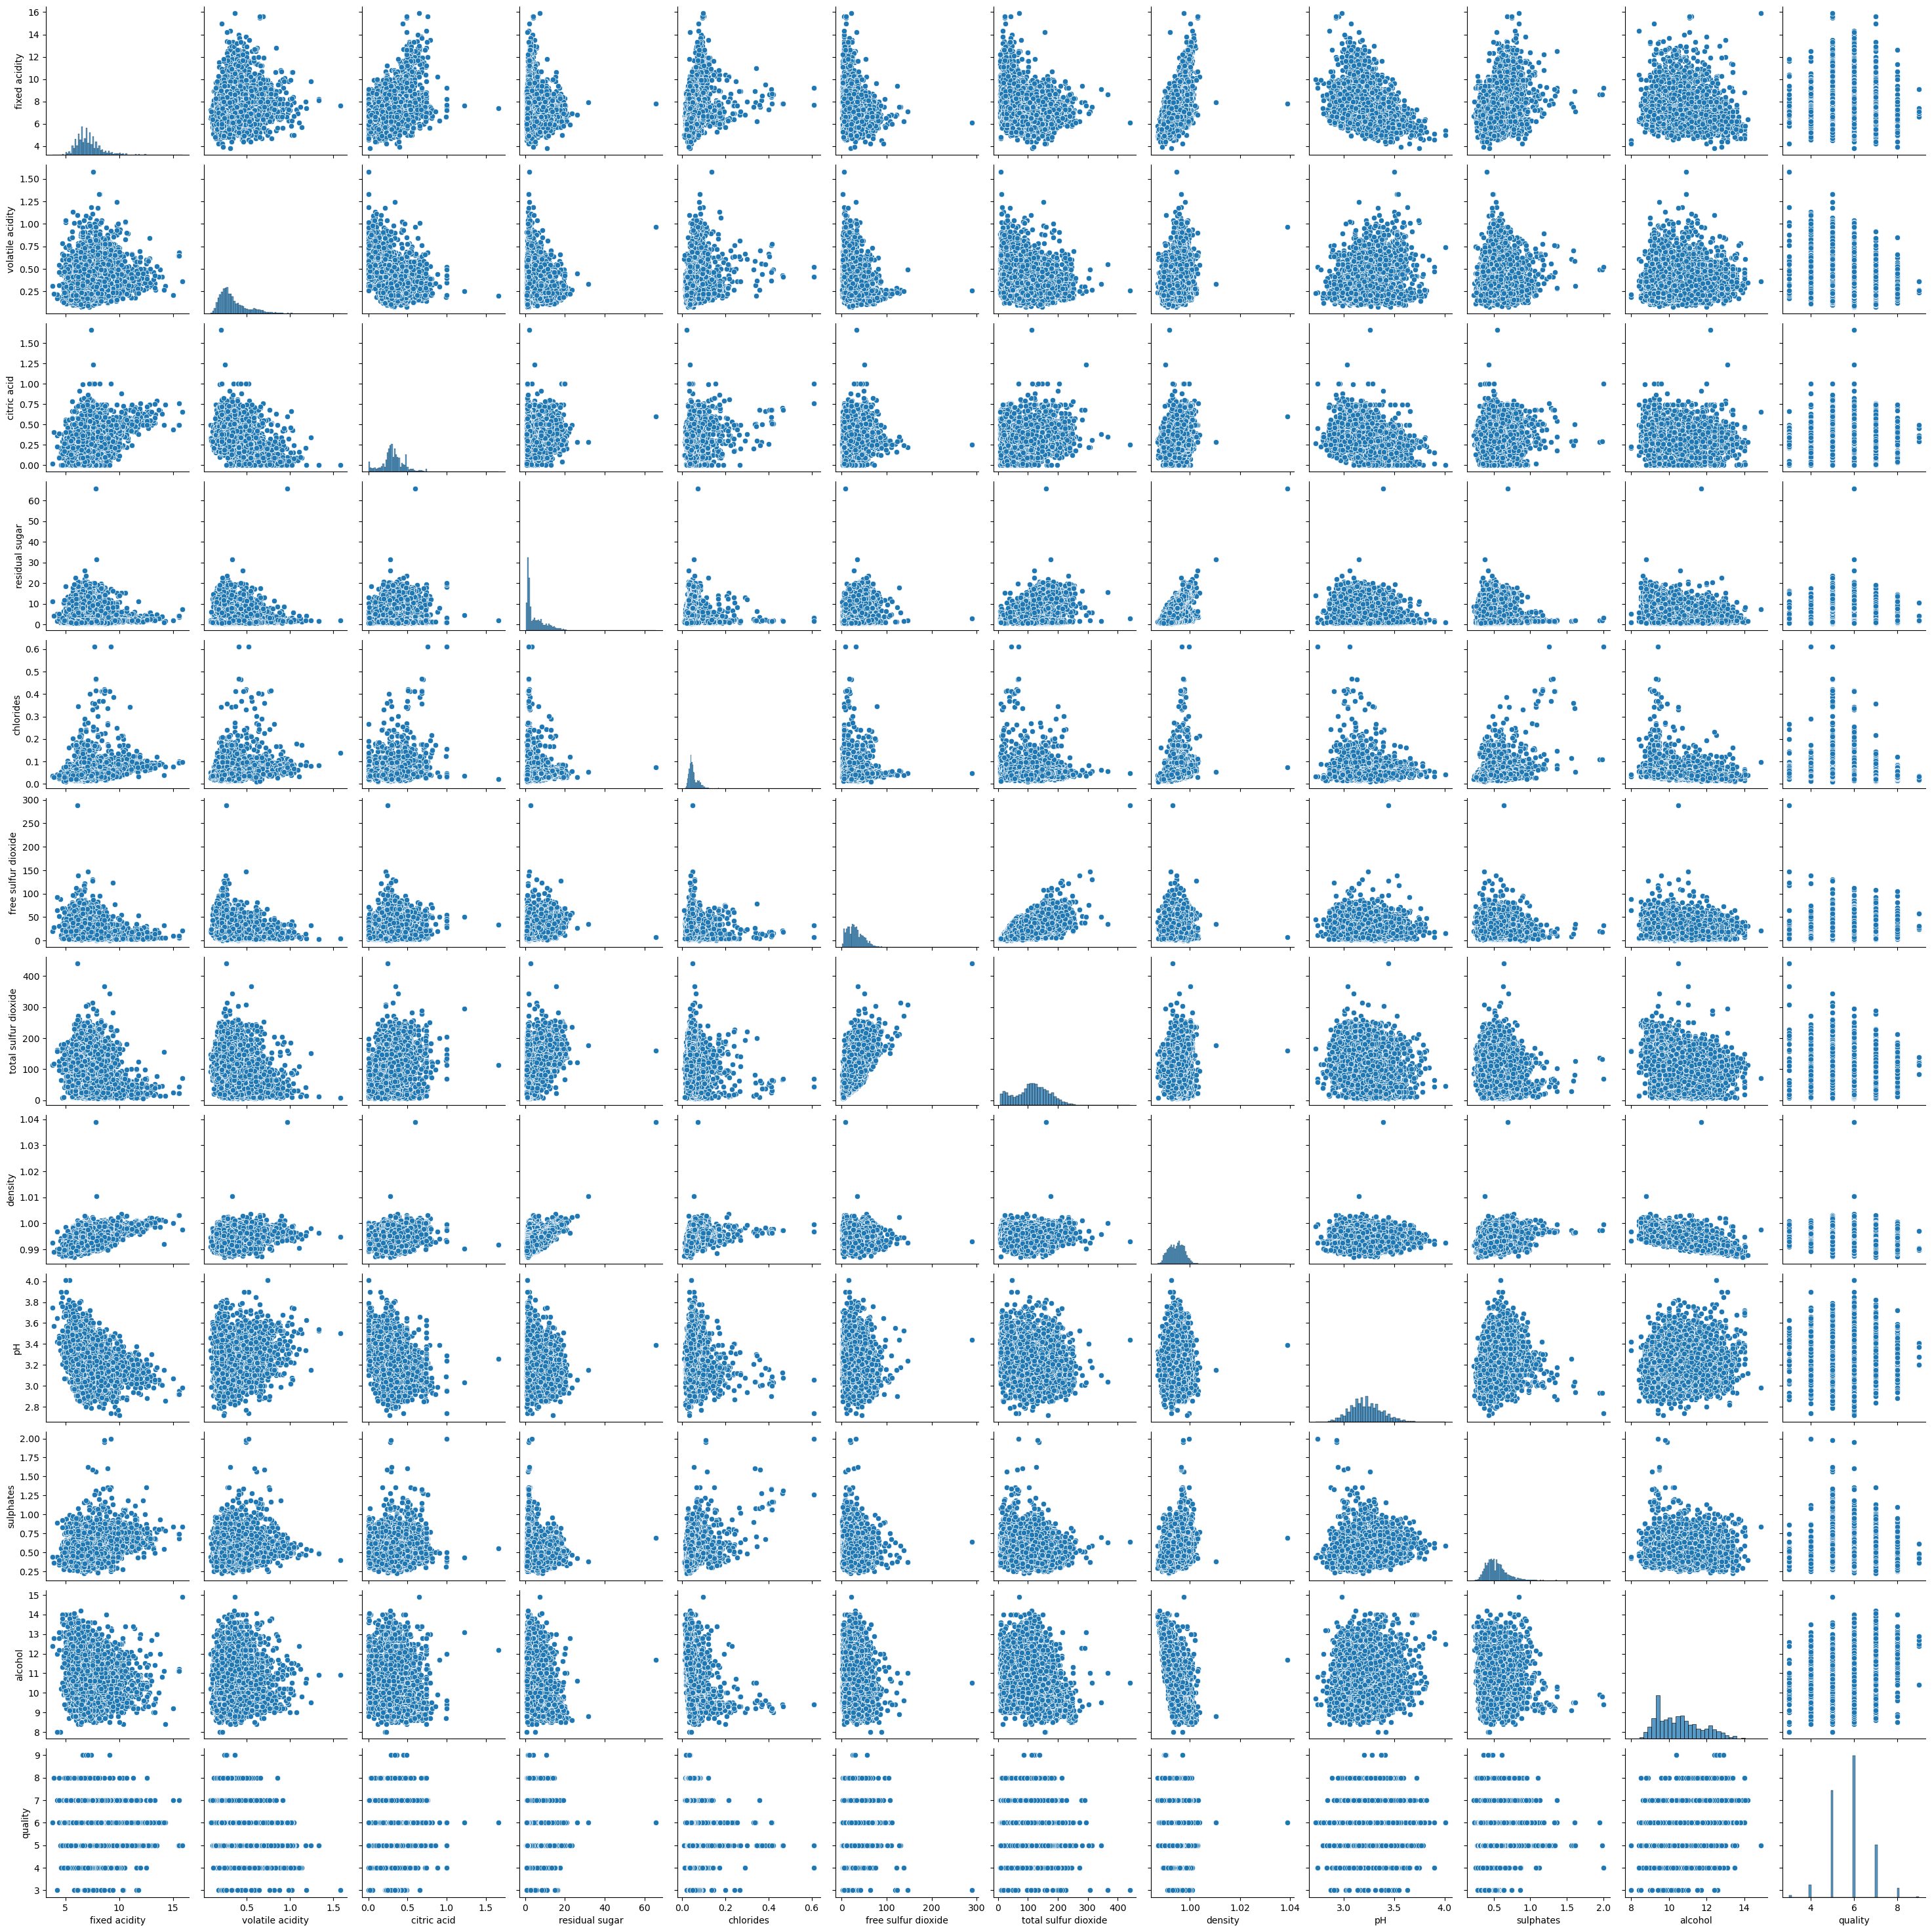

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(wine)
plt.show()

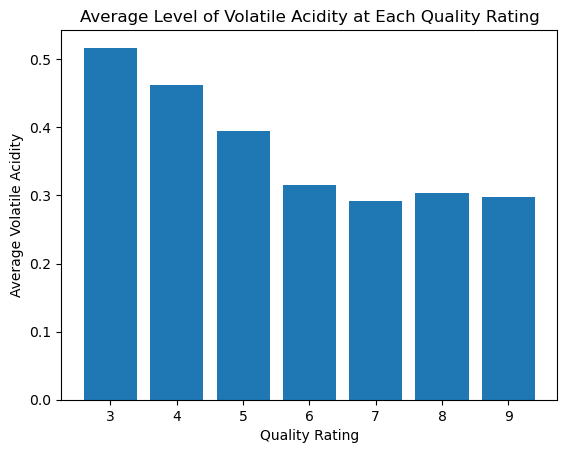

In [4]:
import numpy as np

group_averages = wine.groupby('quality')['volatile acidity'].mean()
plt.bar(group_averages.index, group_averages.values)
plt.xlabel('Quality Rating')
plt.ylabel('Average Volatile Acidity')
plt.title('Average Level of Volatile Acidity at Each Quality Rating')
plt.show()

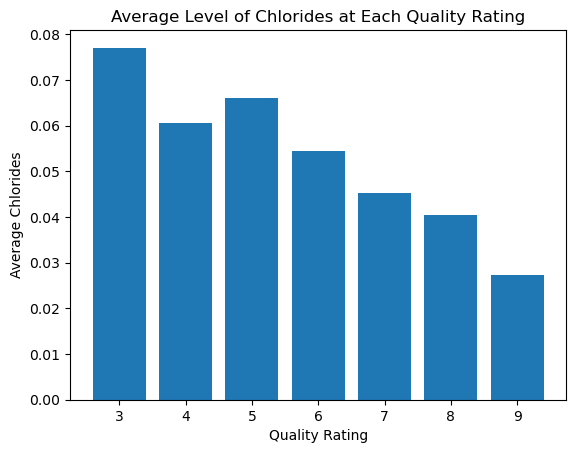

In [5]:
group_averages = wine.groupby('quality')['chlorides'].mean()
plt.bar(group_averages.index, group_averages.values)
plt.xlabel('Quality Rating')
plt.ylabel('Average Chlorides')
plt.title('Average Level of Chlorides at Each Quality Rating')
plt.show()

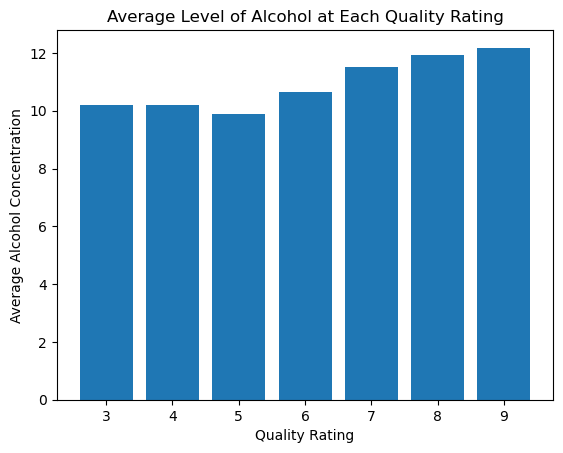

In [6]:
group_averages = wine.groupby('quality')['alcohol'].mean()
plt.bar(group_averages.index, group_averages.values)
plt.xlabel('Quality Rating')
plt.ylabel('Average Alcohol Concentration')
plt.title('Average Level of Alcohol at Each Quality Rating')
plt.show()

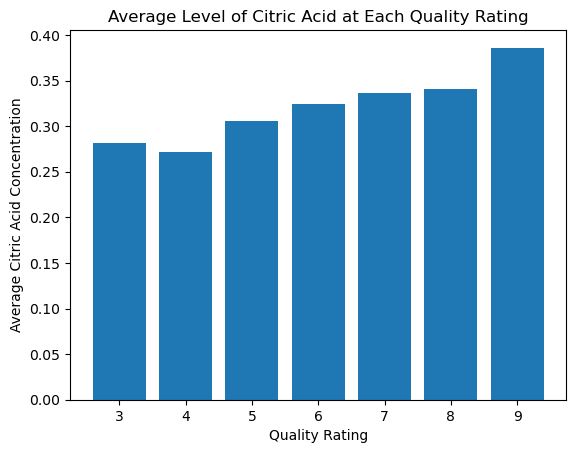

In [7]:
group_averages = wine.groupby('quality')['citric acid'].mean()
plt.bar(group_averages.index, group_averages.values)
plt.xlabel('Quality Rating')
plt.ylabel('Average Citric Acid Concentration')
plt.title('Average Level of Citric Acid at Each Quality Rating')
plt.show()

<h1> LINEAR REGRESSION </h1>
In order to determine which (if any) factors are significant predictors of wine quality, linear regression must be performed to find which factors have a potentially significant relationship with quality.


In [48]:
import statsmodels.formula.api as stats
from sklearn.model_selection import train_test_split

wine['type'] = wine['type'].map({'red': 0, 'white': 1})

X = wine.drop('quality', axis=1)
y = wine['quality']

X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     199.8
Date:                Tue, 29 Apr 2025   Prob (F-statistic):               0.00
Time:                        16:41:26   Log-Likelihood:                -5875.2
No. Observations:                5320   AIC:                         1.178e+04
Df Residuals:                    5307   BIC:                         1.186e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   99.9376 

The large condition number suggests strong multicollinearity, meaning that many of the predictors seem to be highly correlated. This causes many factors to be represented as having a significant relationship with quality, when in reality that is not likely to be the case. The very low R-squared value indicates that a linear relationship is not appropriate for this dataset. Using ridge and lasso regression, we might mitigate the effects of multicollinearity and determine which factors are most signficant. 

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

X = wine.drop('quality', axis=1)
y = wine['quality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

lasso = Lasso(alpha=0.05)  
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

coef = pd.Series(lasso.coef_, index=X.columns)
print("Lasso Coefficients:\n", coef)

R² Score: 0.27926649778288715
MSE: 0.5500619835282643
Lasso Coefficients:
 fixed acidity          -0.000000
volatile acidity       -0.166410
citric acid             0.000000
residual sugar          0.000000
chlorides              -0.000000
free sulfur dioxide     0.008135
total sulfur dioxide   -0.000000
density                -0.000000
pH                      0.000000
sulphates               0.039850
alcohol                 0.353498
type                   -0.000000
dtype: float64


In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

X = wine.drop(columns=['quality'])
y = wine['quality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

ridge = Ridge(alpha=1.0)  
ridge.fit(X_train, y_train)


y_pred = ridge.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

coef_df = pd.DataFrame(ridge.coef_, index=wine.columns.drop('quality'), columns=['Ridge Coefficient'])
print(coef_df)

R² Score: 0.3149473512551313
MSE: 0.5228304465252686
                      Ridge Coefficient
fixed acidity                  0.067292
volatile acidity              -0.219712
citric acid                    0.024907
residual sugar                 0.210857
chlorides                     -0.040093
free sulfur dioxide            0.103449
total sulfur dioxide          -0.102826
density                       -0.236945
pH                             0.075788
sulphates                      0.124432
alcohol                        0.293837
type                          -0.108919


Judging by the coefficients in our linear model, and the coefficients from the lasso and ridge regression models, it would appear that volatile acidity and alcohol are the most significant predictors of quality, with others like density, residual sugar, sulphates, and free sulfur dioxide being potential predictors, but not as strong as volatile acidity and alcohol. 

<h1> CONCLUSIONS </h1>

While the dataset is somewhat difficult to untangle because of strong multicollinearity, it appears that the strongest predictors of the quality of wine are alcohol content, which has a strongly positive relationship with the quality, and volatile acidity, which has a strongly negative relationship with quality. Overall a linear model is not appropriate for the relationship between the factors and wine quality, and the model cannot be used to accurately predict the quality of a wine based on the chemical properties, but we do know that increasing alcohol and decreasing volatile acidity are the most likely ways to increase the quality of a wine. Other factors appear to be heavily related, and so which linear regression counts them all (aside from citric acid) as significant, not all of them are, as they are related to one another rather than the actual quality. Other possible minor factors may include density (negative relationship with quality), residual sugar (positive relationship with quality), sulphates (postive relationship with quality), and free sulfur dioxide (positive relationship with quality), but they are not as clearly significant as alcohol and volatile acidity. 